In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_excel('Pump10RMSTimeData_6h.xls', index_col="time", parse_dates= True)
df.index.freq = 'T'
df = df.dropna()
df.head()

,Value
time,
2019-12-04 06:15:00,1.036545e+16
2019-12-04 06:16:00,9.309101e-01
2019-12-04 06:17:00,9.985042e-01
2019-12-04 06:18:00,1.057677e+16
2019-12-04 06:19:00,9.395600e-01


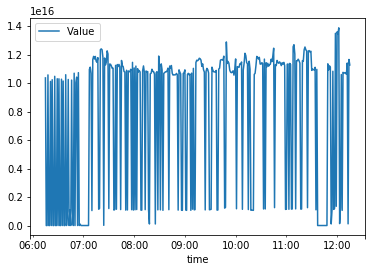

In [5]:
df.plot.line()

In [4]:
from statsmodels.tsa.stattools import adfuller

In [7]:
adfuller(df['Value'])

(-1.2933852000029658,
 0.632193132810938,
 6,
 354,
 {'1%': -3.4489583388155194,
  '5%': -2.869739378430086,
  '10%': -2.5711381780459},
 25755.706306002383)

In [8]:
dftest = adfuller(df['Value'])
dfout = pd.Series(dftest[0:4], index = ['ADF Test Statistics', 'p-value', '# Lags used', '# Observations'])

In [9]:
for key,val in dftest[4].items():
    dfout[f'critical value ({key})'] = val

In [10]:
dfout

ADF Test Statistics      -1.293385
p-value                   0.632193
# Lags used               6.000000
# Observations          354.000000
critical value (1%)      -3.448958
critical value (5%)      -2.869739
critical value (10%)     -2.571138
dtype: float64

In [23]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")


In [12]:
adf_test(df['Value'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -1.293385
p-value                   0.632193
# lags used               6.000000
# observations          354.000000
critical value (1%)      -3.448958
critical value (5%)      -2.869739
critical value (10%)     -2.571138
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

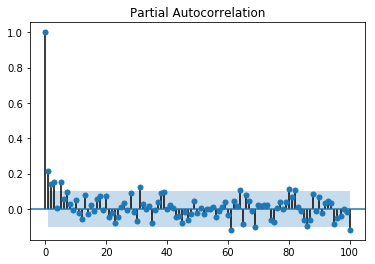

In [19]:
plot_pacf(df, lags = 100);

In [17]:
len(df)

361

In [31]:
from statsmodels.tsa.ar_model import AR, ARIMA, ARIMAResulta

ImportError: cannot import name 'ARIMA' from 'statsmodels.tsa.ar_model' (C:\Users\Darja Strahlberg\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\tsa\ar_model.py)

In [22]:
train = df.iloc[:300]
test = df.iloc[300:]

In [25]:
model = AR(train['Value'])

In [23]:
start = len(train)
end = len(train) + len(test) -1

In [26]:
ARfit = model.fit(ic = 't-stat')

In [27]:
ARfit.params

const        8.510084e-18
L1.Value     1.598908e-01
L2.Value     7.610808e-02
L3.Value     8.639763e-02
L4.Value     3.065410e-02
L5.Value     1.720747e-01
L6.Value     4.921091e-02
L7.Value     7.164428e-02
L8.Value     3.539631e-02
L9.Value     3.388884e-02
L10.Value    3.740740e-02
L11.Value   -9.938154e-03
L12.Value   -2.578147e-02
L13.Value    1.788995e-01
L14.Value   -7.307465e-03
L15.Value    1.000274e-01
dtype: float64

In [28]:
predictions15 = ARfit.predict(start, end)
predictions15 = predictions15.rename('AR(15) Predictions')

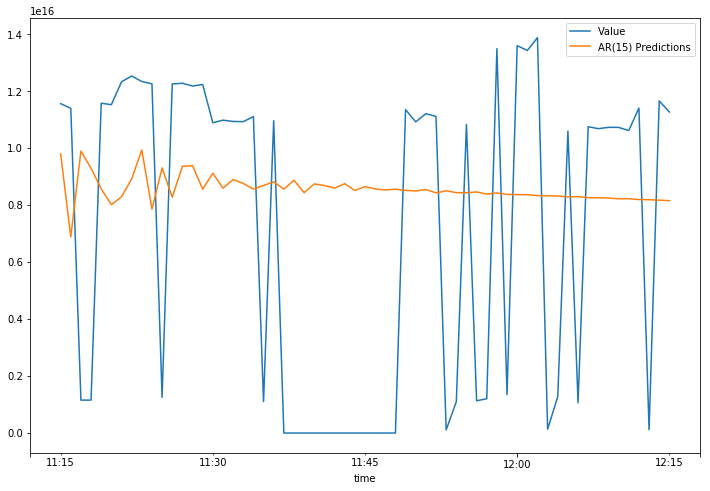

In [29]:
test.plot(figsize =(12,8), legend = True)
predictions15.plot(legend = True)



In [35]:
forecasted_values = ARfit.predict(start=len(df), end=len(df)+60).rename('Forecast') 

ValueError: end is before start

In [36]:
predictions15.head()

2019-12-04 11:15:00    9.800772e+15
2019-12-04 11:16:00    6.887783e+15
2019-12-04 11:17:00    9.900138e+15
2019-12-04 11:18:00    9.294364e+15
2019-12-04 11:19:00    8.574903e+15
Freq: T, Name: AR(15) Predictions, dtype: float64

In [5]:
from pmdarima import auto_arima 

In [13]:
stepwise_fit = auto_arima(df['Value'], start_p=0, start_q=0, max_p=4, max_q=4, seasonal= True, trace = True, m=12)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=27218.066, BIC=27233.610, Fit time=0.594 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=27218.536, BIC=27226.308, Fit time=0.032 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=27123.868, BIC=27139.412, Fit time=0.168 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=27024.695, BIC=27040.239, Fit time=0.566 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=27023.786, BIC=27043.217, Fit time=0.826 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 0, 12); AIC=27025.577, BIC=27041.121, Fit time=0.182 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 2, 12); AIC=27025.307, BIC=27048.624, Fit time=1.450 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=27027.083, BIC=27038.741, Fit time=0.068 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 0, 2, 12); AIC=27027.285, BIC=27054.487, Fit time=1.904 seconds
Fit ARIMA:

C:\Users\Darja Strahlberg\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\Darja Strahlberg\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\Darja Strahlberg\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\representatio

In [14]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  361
Model:             SARIMAX(3, 1, 3)x(0, 0, 1, 12)   Log Likelihood              -13499.730
Date:                            Thu, 05 Dec 2019   AIC                          27017.459
Time:                                    11:58:53   BIC                          27052.434
Sample:                                         0   HQIC                         27031.366
                                            - 361                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.173e-17   2.49e-10   -4.7e-08      1.000   -4.89e-10    4.89e-10
ar.L1         -1.3874      0.063    -22.009      0.000      -1.511      -1.264
ar.L2         -0.7919      0.095     -8.297      0.000      -0.979      -0.605
ar.L3          0.1302      0.061      2.125      0.034       0.010       0.250
ma.L1          0.5580      0.033     17.000      0.000       0.494       0.622
ma.L2         -0.4064      0.037    -11.119      0.000      -0.478      -0.335
ma.L3         -0.8942      0.030    -29.867      0.000      -0.953      -0.836
ma.S.L12      -0.0905      0.061     -1.480      0.139      -0.210       0.029
sigma2      2.308e+31   2.08e-34   1.11e+65      0.000    2.31e+31    2.31e+31
===================================================================================
Ljung-Box (Q):                       31.40   Jarque-Bera (JB):                27.52
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -0.58
Prob(H) (two-sided):                  0.94   Kurtosis:                         2.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.14e+81. Standard errors may be unstable.
"""

In [15]:
len(df)


361

In [11]:
train = df.iloc[:300]
test = df.iloc[300:]

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose 

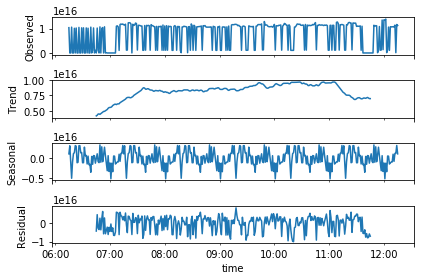

In [46]:
result = seasonal_decompose(df['Value'], model ='add', freq = 60)
result.plot();

In [22]:
auto_arima(df['Value'], seasonal = False).summary()

C:\Users\Darja Strahlberg\Anaconda3\envs\tsa_course\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Darja Strahlberg\Anaconda3\envs\tsa_course\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Darja Strahlberg\Anaconda3\envs\tsa_course\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tupl

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARIMA Model Results                               
================================================================================
Dep. Variable:                    D.y   No. Observations:                    360
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -13509.995
Method:                       css-mle   S.D. of innovations 4795931494679066.000
Date:                Thu, 05 Dec 2019   AIC                            27025.990
Time:                        13:36:08   BIC                            27037.648
Sample:                             1   HQIC                           27030.626
                                                                                
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.516e+12    2.7e+13      0.093      0.926   -5.04e+13    5.54e+13
ma.L1.D.y     -0.8980      0.035    -25.492      0.000      -0.967      -0.829
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.1135           +0.0000j            1.1135            0.0000
-----------------------------------------------------------------------------
"""

In [24]:
adf_test(df['Value'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -1.293385
p-value                   0.632193
# lags used               6.000000
# observations          354.000000
critical value (1%)      -3.448958
critical value (5%)      -2.869739
critical value (10%)     -2.571138
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [25]:
df['Diff_1'] = diff(df['Value'], k_diff = 1)

NameError: name 'diff' is not defined

In [26]:
from statsmodels.tsa.statespace.tools import diff

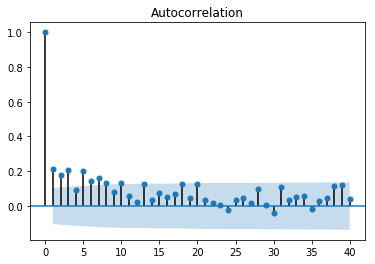

In [32]:
plot_acf(df['Value'], lags = 40);

In [6]:
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults




In [34]:
model = ARIMA(train['Value'], order=(0,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARIMA Model Results                               
================================================================================
Dep. Variable:                D.Value   No. Observations:                    299
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -11211.549
Method:                       css-mle   S.D. of innovations 4643565797644332.000
Date:                Thu, 05 Dec 2019   AIC                            22429.099
Time:                        14:02:37   BIC                            22440.200
Sample:                    12-04-2019   HQIC                           22433.542
                         - 12-04-2019                                           
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.396e+12   2.36e+13      0.186      0.852   -4.19e+13    5.07e+13
ma.L1.D.Value    -0.9410      0.034    -27.623      0.000      -1.008      -0.874
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0627           +0.0000j            1.0627            0.0000
-----------------------------------------------------------------------------
"""

In [12]:
start = len(train)
end = len(train) + len(test) -1

In [37]:
predictions = results.predict(start = start, end = end, type ='levels').rename('ARIMA(0,1,1) Predictions')

TypeError: predict() got an unexpected keyword argument 'type'

In [ ]:
test['Value'].plot(legend = True, figsize = (12,8))
predictions.plot(legend = True)



In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [41]:
df.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 2019-12-04 06:15:00 to 2019-12-04 12:15:00
Freq: T
Data columns (total 1 columns):
Value    361 non-null float64
dtypes: float64(1)
memory usage: 5.6 KB


In [43]:
df.index = pd.to_datetime(df.index)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 2019-12-04 06:15:00 to 2019-12-04 12:15:00
Freq: T
Data columns (total 1 columns):
Value    361 non-null float64
dtypes: float64(1)
memory usage: 5.6 KB


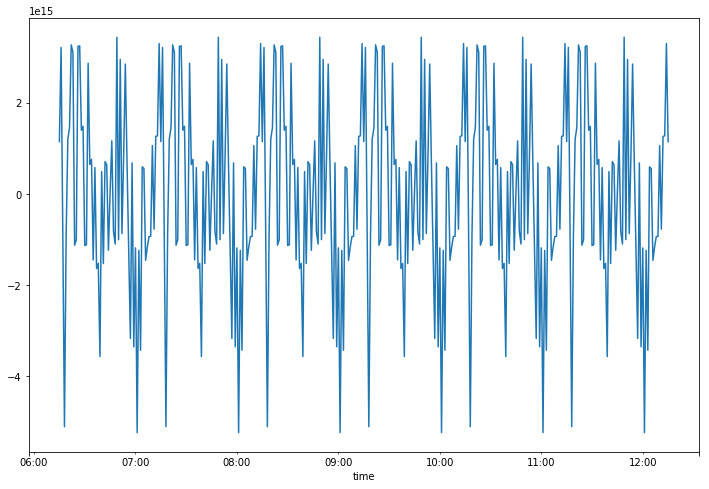

In [47]:
result.seasonal.plot(figsize = (12,8));

In [49]:
stepwise_fit = auto_arima(df['Value'], seasonal = True, m = 60)

C:\Users\Darja Strahlberg\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\Darja Strahlberg\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\Darja Strahlberg\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\representatio

In [8]:
stepwise_fit = auto_arima(df['Value'], seasonal = True, m = 60)


C:\Users\Darja Strahlberg\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\Darja Strahlberg\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\Darja Strahlberg\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\representatio

In [9]:
stepwise_fit.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  361
Model:               SARIMAX(1, 1, 2)   Log Likelihood              -13507.295
Date:                Thu, 05 Dec 2019   AIC                          27024.590
Time:                        16:54:06   BIC                          27044.020
Sample:                             0   HQIC                         27032.316
                                - 361                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.164e-18   3.43e-16     -0.009      0.993   -6.75e-16    6.69e-16
ar.L1         -0.7880      0.188     -4.184      0.000      -1.157      -0.419
ma.L1         -0.0605      0.167     -0.363      0.717      -0.387       0.266
ma.L2         -0.7700      0.147     -5.253      0.000      -1.057      -0.483
sigma2      2.351e+31   1.41e-33   1.66e+64      0.000    2.35e+31    2.35e+31
===================================================================================
Ljung-Box (Q):                       41.11   Jarque-Bera (JB):                29.27
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                            -0.56
Prob(H) (two-sided):                  0.73   Kurtosis:                         2.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.28e+79. Standard errors may be unstable.
"""

In [28]:
model = SARIMAX(train['Value'], order =(1,1,2), seasonal_oder = (0,0,1,12) )



In [29]:
resultsS = model.fit()



In [30]:
resultsS.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  Value   No. Observations:                  300
Model:               SARIMAX(1, 1, 2)   Log Likelihood              -11209.743
Date:                Thu, 05 Dec 2019   AIC                          22427.486
Time:                        17:18:58   BIC                          22442.288
Sample:                    12-04-2019   HQIC                         22433.410
                         - 12-04-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8654      0.158     -5.478      0.000      -1.175      -0.556
ma.L1         -0.0293      0.136     -0.216      0.829      -0.296       0.237
ma.L2         -0.8530      0.125     -6.805      0.000      -1.099      -0.607
sigma2      2.273e+31   2.65e-34   8.58e+64      0.000    2.27e+31    2.27e+31
===================================================================================
Ljung-Box (Q):                       37.63   Jarque-Bera (JB):                28.60
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                            -0.65
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.06e+81. Standard errors may be unstable.
"""

In [31]:
predictions = resultsS.predict(start, end, typ ='levels').rename('SARIMA Predictions')


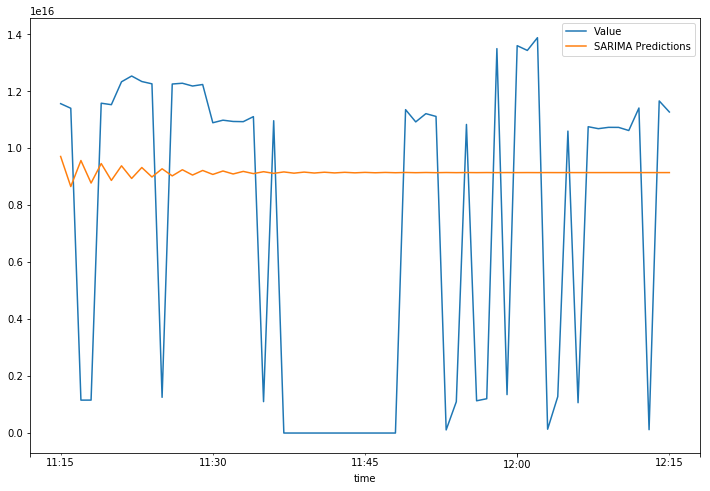

In [32]:
test['Value'].plot(legend = True, figsize = (12,8))
predictions.plot(legend = True)

In [17]:
from statsmodels.tools.eval_measures import rmse

In [18]:
error = rmse(test['Value'], predictions)

In [19]:
test.mean()

Value    7.062388e+15
dtype: float64

In [20]:
error

5920365822942297.0

In [26]:
movingAverage = test['Value'].rolling(window =12).mean().rename('Moving Average')

time
2019-12-04 11:15:00             NaN
2019-12-04 11:16:00             NaN
2019-12-04 11:17:00             NaN
2019-12-04 11:18:00             NaN
2019-12-04 11:19:00             NaN
2019-12-04 11:20:00             NaN
2019-12-04 11:21:00             NaN
2019-12-04 11:22:00             NaN
2019-12-04 11:23:00             NaN
2019-12-04 11:24:00             NaN
2019-12-04 11:25:00             NaN
2019-12-04 11:26:00    9.280388e+15
2019-12-04 11:27:00    9.340111e+15
2019-12-04 11:28:00    9.405185e+15
2019-12-04 11:29:00    1.032868e+16
2019-12-04 11:30:00    1.114016e+16
2019-12-04 11:31:00    1.109047e+16
2019-12-04 11:32:00    1.104136e+16
2019-12-04 11:33:00    1.092468e+16
2019-12-04 11:34:00    1.080583e+16
2019-12-04 11:35:00    9.869206e+15
2019-12-04 11:36:00    9.761252e+15
2019-12-04 11:37:00    9.656826e+15
2019-12-04 11:38:00    8.635639e+15
2019-12-04 11:39:00    7.612211e+15
2019-12-04 11:40:00    6.596920e+15
2019-12-04 11:41:00    5.577171e+15
2019-12-04 11:42:00    

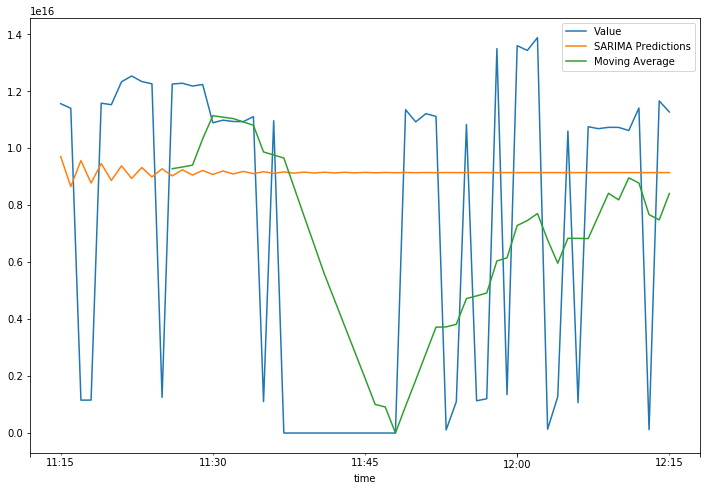

In [27]:
test['Value'].plot(legend = True, figsize = (12,8))
predictions.plot(legend = True)
movingAverage.plot(legend = True)
